<a href="https://colab.research.google.com/github/2d1ff1cult/UNLV_SEDS_SPARK2/blob/main/SPARK2_RocketCEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNLV SEDS SPARK 2 RocketCEA
# Implemented by: Jerome Ariola
[github](https://github.com/2d1ff1cult/UNLV_SEDS_SPARK2/)

some todo:
# **for now set a constant value for eps of FIFTY (50) until a propellant is selected**
- cross validate with actual CEA data
- validate with current MATLAB code
- validate using $CH4 (F)$ and $O2L (O)$ as seen in [this video](https://www.youtube.com/watch?v=9urwkTG6sCs&t=147s)

Link to RocketCEA
https://rocketcea.readthedocs.io/en/latest/quickstart.html

unrelated note:
how the heck did i find this? i was for something that tabulated cea raw data since team-written MATLAB code was buggy at times

# changelog

24 Apr 2024
- added changelog
- implemented peak detection with pandas

17 Apr 2024
- added simultaneous plotting of temperature and Isp against mixture ratio

12 Apr 2024
- added multiple graph functions per RocketCEA example code

9 Apr 2024
- created this notebook

# some notes

### <font color='red'> PLEASE READ EACH TEXT DESCRIPTION BEFORE RUNNING CODE</font>
# <font color='red'>IF YOU DON'T KNOW WHAT YOU'RE DOING JUST CHANGE THE **PROPELLANTS**, I.E. THE `fuels[]` ARRAY!!!!!!</font>
# <font color='red'> IF THE FUELS ARRAY IS NOT AVAILABLE, IT'S PROBABLY A SINGLE PROP CALCULATOR. UPDATE `oxName` and `fuelName`</font>

# [run this cell after connecting to runtime](https://colab.research.google.com/drive/1yMPYzxLW0sBjeukgHszyjQCe6WJzNoI6#scrollTo=o2-alW47B1RI&line=1&uniqifier=1) which installs the rocketcea library

rocketcea:
- you can follow sample code, but i advise you `import matplotlib.pyplot as plt` instead of `from pylab import *` since the use of the latter has been deprecated/discouraged by matplotlib devs

matplotlib:
- you can keep plotting data before `plt.show()` to add more "graphs" to a plot
- more graphs can be added via a loop and plotting through `ax`
- `plt` plots on the entire plot, whereas with `fig, ax = plt.subplots()`, `ax` will plot on a different set of data

technical:
- on a conventional converging diverging nozzle, the eps or gamma value MUST be greater than 1, otherwise, you are not working with a converging diverging nozzle.
  - $A_e/A_t$ refers to the area of the exit and area of at the throat; if the throat area is larger than the area of the exit, then you are not working with a converging diverging nozzle
  - when $A_e$ is larger than $A_t$, then the ratio is larger than 1, else the value is less than 1.
- there are no magical list of parameters that can be optimized for a given propellant (i.e. fuel/ox mixture) that grants you more specific impulse
  - it all comes down to fundamental chemical properties of the fuel/ox mix (specifically enthalpy, molar mass, etc.)
- consider the intersection of the ${O/F}$ vs ${I_\text{sp}}$ graph with ${O/F}$ vs. Temperature;
![image](https://media.discordapp.net/attachments/1228273644116115467/1230759799621287976/of_to_isp_graph_and_temp_graph.png?ex=66347d62&is=66220862&hm=128b8db93aa6f2289af075b014e158e80c14c4221c9fae77e67ce22885c8b47d&=&format=webp&quality=lossless&width=452&height=415)
  - to the left of stoichiometric mixture ratio (i.e. the peak of an ${O/F}$ vs. ${I_\text{sp}}$ graph), the mixture is said to be **fuel rich** since when equilibrium is calculated, the propellant burns with components of the fuel at the chemical product.
  - to the right of stoichiometric mixture ratio, the mixture is said to be **ox rich** since oxygen can be found in the products
  - overly simplified and chemically inaccurate chemical equation to demonstrate:
  ${\text{2O}_\text{2}+CH_\text{2} = CO_\text{4}+2H\text{2}O}$
- when the isp graph is higher than the temperature line:
  - specific magnitude differences at different OF ratios
    - larger difference, lower temperatures = better engine
  - set some minimum ${I_\text{sp}}$
    - within that ${I_\text{sp}}$ range, when is the difference the greatest
    - that means that we optimize efficiency AND temperature
    ![](https://media.discordapp.net/attachments/1228273644116115467/1230759199491751936/image.png?ex=66347cd3&is=662207d3&hm=35843d05e390335c5df2f889f1f1a4171353e4aaaa124033361f974f863b37c0&=&format=webp&quality=lossless&width=809&height=407)
  - if the fuel graph is **above** the temperature line, this is the ideal range of mixture ratios
- lower molecular weight yields a higher thrust coefficient (Cf)

non-technical:

markdown:
- latex is cool and useful for writing equations (google for more information but the syntax is something like this: `${I_\text{sp}}$` to display ${I_\text{sp}}$)

# <font color='red'>(run before each instance) Install RocketCEA</font>

In [1]:
!pip install RocketCEA pandas -q #parasol -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


# $C*$ Plot test at different pressures (Single Prop)

In [ ]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

# can add more pressures for simultaneous calculation
pcL = [500., 130., 75.]

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='N2O4', fuelName="A50")

for Pc in pcL:
  cstararr = []
  MR = 2.0
  mrarr = []
  while MR < 8.0:
    cstararr.append(ispObj.get_Cstar( Pc=Pc, MR=MR))
    mrarr.append(MR)
    MR += 0.05
  plot(mrarr,cstararr,label='Pc=%g psia'%Pc)

legend(loc='best')
grid(True)
title(ispObj.desc + "\n C* Graph")
xlabel('Mixture Ratio')
ylabel('C* (ft/sec)')

show()

ModuleNotFoundError: No module named 'rocketcea'

# Variable Area Ratios Plot

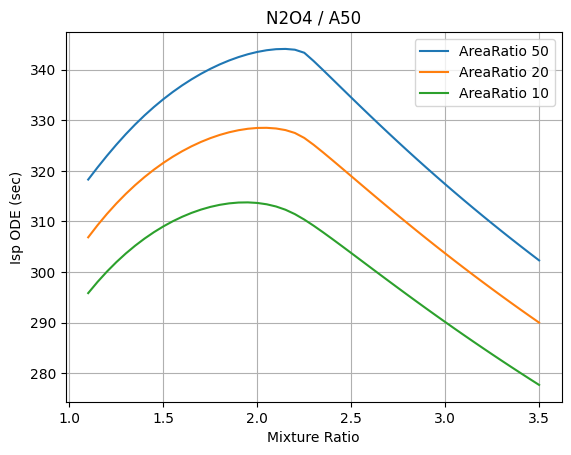

In [ ]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

Pc = 500.0

ispIRFNA = CEA_Obj(propName='', oxName='N2O4', fuelName="A50")
for e in [50.0,20.0,10.0]:
    ispArr = []
    MR = 1.1
    mrArr = []
    while MR < 3.5:
        ispArr.append( ispIRFNA(Pc, MR, e ))
        mrArr.append(MR)
        MR += 0.05
    plot(mrArr, ispArr, label='AreaRatio %g'%e)

legend(loc='best')
grid(True)
title( ispIRFNA.desc )
xlabel( 'Mixture Ratio' )
ylabel( 'Isp ODE (sec)' )
# savefig('cea_plot.png', dpi=120)

show()

# Simultaneous $MR$ v. ${I_\text{sp}}$ graphs (Multi Prop)

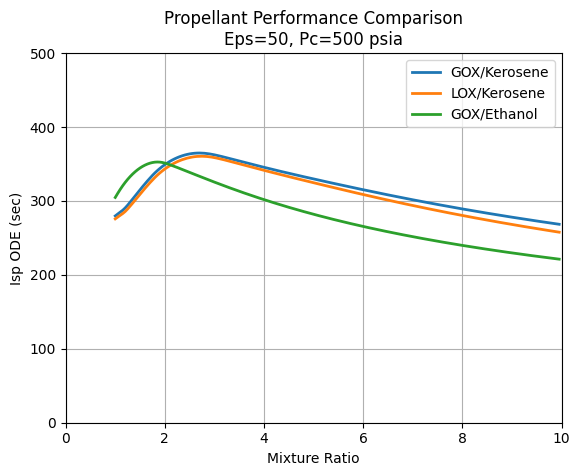

In [ ]:
from rocketcea.cea_obj import CEA_Obj
import matplotlib.pyplot as plt

Pc = 500.0
eps = 50.0
mrMin = 1.0
mrStep = 0.05 # adjust for precision
mrMax = 10.0

# use this to change grid bounds
minx = 0  #default 0
maxx = 10 #default 10
miny = 0
maxy = 500

mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
ispLL = [] # a list of lists of Isp data

fig, ax = plt.subplots()
isp = ax
# format: ['ox', 'fuel']
fuels = [
    ('LOX','Kerosene'),
    ('GOX','Kerosene'),
    ('GOX','Ethanol'),
]

for oxName,fuelName in fuels:

    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for MR in mrL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

ispLL.sort(reverse=True) # sort in-place from high to low

for maxIsp, name, ispL in ispLL:
    isp.plot(mrL, ispL, label=name, linewidth=2)

isp.legend(loc='best')
isp.grid(True)
isp.set_xlabel( 'Mixture Ratio' )
isp.set_ylabel( 'Isp ODE (sec)' )

# plot limits
plt.xlim(minx,maxx)
plt.ylim(miny,maxy)
plt.title( 'Propellant Performance Comparison\nEps=%g, Pc=%g psia'%(eps,Pc) )
plt.show()

# Simulataneous $\epsilon$ vs ${I_\text{sp}}$ (Multi Prop)
## not a useful calculator, just builds intuition
just a demonstration that expansion ratio acts like a multiplier that affects specific impulse.

also that $\epsilon$ or $\gamma$ can be the area ratio between the size of the universe and an atom, and your ${I_\text{sp}}$ will not change

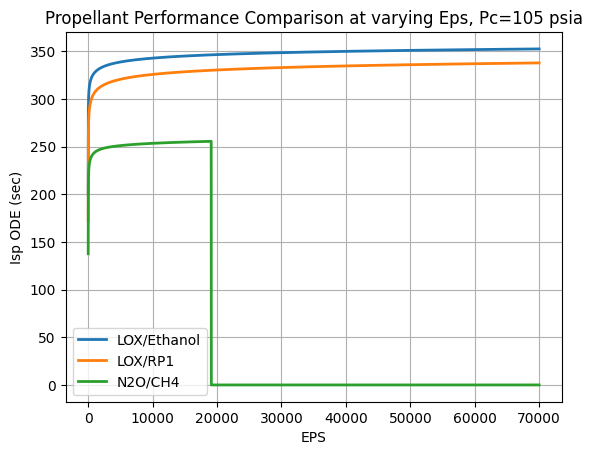

In [ ]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

Pc = 105.0
epsMin = 1.0
epsMax = 70000.0
epsStep = 10
MR = 1.0

epsL = [epsMin + i*epsStep for i in range( int((epsMax-epsMin)/epsStep))]
ispLL = [] # a list of lists of Isp data

for oxName,fuelName in [('LOX','RP1'), ('N2O','CH4'),('LOX','Ethanol')]:
    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for eps in epsL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

ispLL.sort(reverse=True) # sort in-place from high to low

for maxIsp, name, ispL in ispLL:
    plot(epsL, ispL, label=name, linewidth=2)

legend(loc='best')
grid(True)
title( 'Propellant Performance Comparison at varying Eps, Pc=%g psia'%(Pc) )
xlabel( 'EPS' )
ylabel( 'Isp ODE (sec)' )

show()

# O/F vs. Isp with sliders (Multi Prop)
TODO: add peaks for stoichiometric ratio

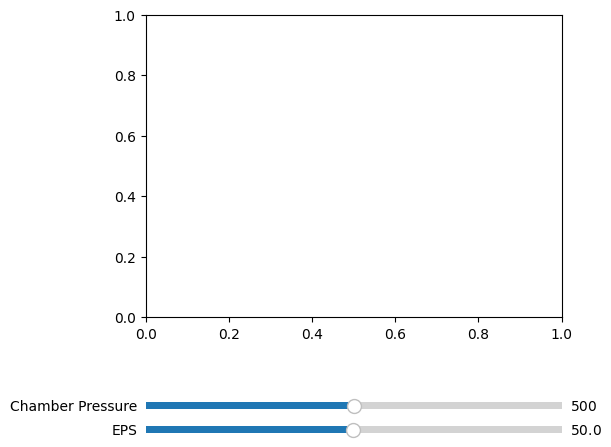

In [ ]:
from rocketcea.cea_obj import CEA_Obj
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button, Slider

Pc = 500.0
eps = 27.0
mrMin = 0
mrStep = 0.1
mrMax = 10.0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

boxeps = fig.add_axes([0.25, 0, 0.65, 0.03])
slidereps = Slider(
    ax=boxeps,
    label='EPS',
    valmin=0.1,
    valmax=100,
    valinit=50,
    orientation="horizontal"
)

boxpc = fig.add_axes([0.25, 0.05, 0.65, 0.03])
sliderpc = Slider(
    ax=boxpc,
    label="Chamber Pressure",
    valmin=0,
    valmax=1000,
    valinit=500,
    orientation="horizontal"
)

fuels = [
    ('LOX','RP1'),
    ('LOX','Ethanol'),
    ('N2O','Ethanol'),
    ('LOX','Gasoline'),
    ('N2O','Gasoline'),
]

# The function to be called anytime a slider's value changes
def update(val):
    ax.clear()
    Pc = sliderpc.val
    eps = slidereps.val
    mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
    ispLL = [] # a list of lists of Isp data
    for oxName,fuelName in fuels:

        ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

        ispL = [ispObj.get_Isp(Pc=sliderpc.val, MR=MR, eps=slidereps.val) for MR in mrL]
        ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

    ispLL.sort(reverse=True) # sort in-place from high to low

    for maxIsp, name, ispL in ispLL:
        ax.plot(mrL, ispL, label=name, linewidth=2)

    ax.legend(loc='best')
    ax.grid(True)
    plt.title( 'Performance Comparison at Eps=%g, Pc=%g psia'%(eps,Pc),loc='center')
    ax.set_xlabel( 'Mixture Ratio' )
    ax.set_ylabel( 'Isp ODE (sec)' )
    print('Pc set to: %g  EPS set to: %g'%(Pc,eps))
    fig.canvas.draw_idle()

# register the update function with each slider
slidereps.on_changed(update)
sliderpc.on_changed(update)

plt.show()

# User prompted EPS adjustment (Multi Prop)

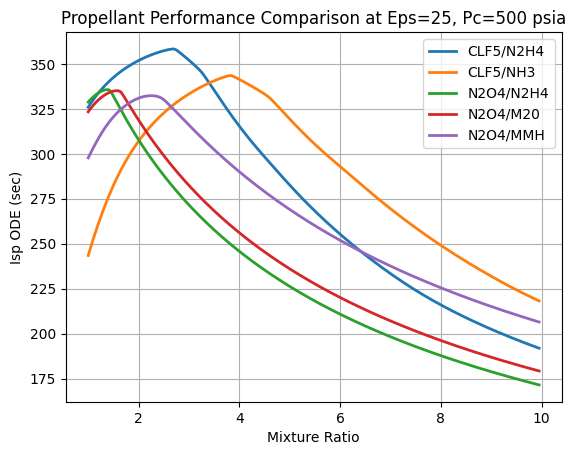

In [ ]:
from rocketcea.cea_obj import CEA_Obj
import matplotlib.pyplot as plt

Pc = 500.0
eps = 25.0
mrMin = 1.0
mrStep = 0.05
mrMax = 10.0


def plot_and_update(eps):
  """Plots the data and prompts for new eps value."""
  plt.cla()
  mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
  ispLL = [] # a list of lists of Isp data
  fuelox = [('N2O4','N2H4'),('N2O4','MMH'),('N2O4','M20'),
                          ('CLF5','N2H4'),('CLF5','NH3')]
  for oxName, fuelName in fuelox:
    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )
    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for MR in mrL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

  ispLL.sort(reverse=True) # sort in-place from high to low

  for maxIsp, name, ispL in ispLL:
    plt.plot(mrL, ispL, label=name, linewidth=2)

  plt.legend(loc='best')
  plt.grid(True)
  plt.title( 'Propellant Performance Comparison at Eps=%g, Pc=%g psia'%(eps,Pc) )
  plt.xlabel( 'Mixture Ratio' )
  plt.ylabel( 'Isp ODE (sec)' )

  plt.show()

  new_eps = input("Enter new eps value (or 'q' to quit): ")
  if new_eps.lower() != 'q':
    try:
      new_eps = float(new_eps)
      # Clear the plot for redraw
      plt.cla()
      plot_and_update(new_eps)
    except ValueError:
      print("Invalid input. Please enter a number.")

plot_and_update(eps)  # initial plot

# O/F vs. Isp, Temp (Single Prop)

[0.0, 178.57931056747879, 201.42874266608013, 218.54795850642122, 231.8351845210834, 242.42383907465754, 251.1101564656077, 258.4580542314626, 264.85473080656027, 270.5653479564866, 275.77503577432583, 280.612816973523, 285.74984463045945, 293.0132298824114, 301.05092052218174, 309.18292074261814, 317.1210249086635, 324.72641524290026, 331.78401625685694, 337.96233730564364, 343.25585615294153, 347.74846653715554, 351.50387389490794, 354.56792223481744, 356.97412152470105, 358.74623280238313, 359.8997741774285, 360.444365703109, 360.3890520956047, 359.7636383645025, 358.65144430379934, 357.2082608458895, 355.57929024415006, 353.8539965644726, 352.08161583607574, 350.28971873684833, 348.4942413973343, 346.70452058660777, 344.9259373415762, 343.1613928310923, 341.4121816003496, 339.6785367307454, 337.9599898583596, 336.25562107594817, 334.5642464106159, 332.8845653504032, 331.2152828756558, 329.55521092229924, 327.9033488227053, 326.2589393569598, 324.6214976349638, 322.9908100616006, 32

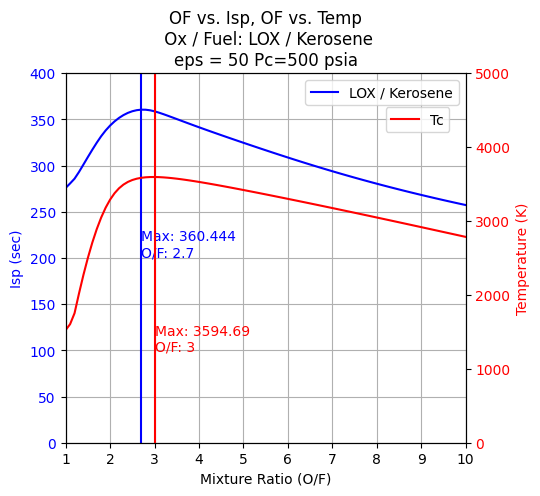

In [ ]:
# for single propellant mix and pressure use
import matplotlib.pyplot as plt
from rocketcea.cea_obj import CEA_Obj
import pandas as pd

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

kelvin = 0.5555555556 #how many kelvins in a rankine

# use this to change grid bounds
minx = 1  #default 0
maxx = 10 #default 10

# sample pcL from quickstart guide of rocketcea
Pc = 500.
eps = 50.

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="Kerosene")

isparr = []
temprankine = []
tempkelvin = []
MR = 0.0
mrarr = []
label = []

while MR < 10.0:
  isparr.append(ispObj.get_Isp(Pc=Pc, MR=MR,eps=eps))
  temprankine.append(ispObj.get_Temperatures(Pc=Pc, MR=MR, eps=eps))

  mrarr.append(MR)
  MR += 0.1 # smaller for more precise data

isp = ax # defining primary plot
temp = ax.twinx()

temp.spines.right.set_position(("axes", 1))

isp.plot(mrarr,isparr,'b',label=ispObj.desc) # defining ispplot as primary

def findmax(xseries, yseries, axis, color):
  xmax = pd.Series(xseries).idxmax() # index of max xseries
  ymax = pd.Series(yseries).idxmax() # index of max yseries
  axis.annotate('Max: %g\nO/F: %g'%(yseries[ymax],xseries[ymax]), xy = (xseries[ymax], yseries[ymax-25]),color=color)
  axis.axvline(x = xseries[ymax],ymin = 0, ymax = yseries[ymax],color = color)
  print(xseries[ymax]/5)
  print(yseries[ymax]/5)


#change index for array for different TCA locations
# 0 = chamber
# 1 = throat
# 2 = exit
tempkelvin = [t[0] * kelvin for t in temprankine]
print(isparr)
print(tempkelvin)
tempplot = temp.plot(mrarr,tempkelvin,'r',label='Tc')
isp.set_xlabel('Mixture Ratio (O/F)')
isp.set_ylabel('Isp (sec)')
isp.yaxis.label.set_color('blue')
isp.tick_params(axis='y', labelcolor='blue')
isp.set_ylim([0,400])

temp.set_ylabel("Temperature (K)", color='red')
temp.yaxis.label.set_color('red')
temp.tick_params(axis='y', labelcolor='red')
temp.set_ylim([0,5000])

isp.legend(loc='upper right')
temp.legend(loc=[0.8,0.84])
isp.grid(True)

plt.xlim(minx,maxx)
plt.title("OF vs. Isp, OF vs. Temp\n Ox / Fuel: " + ispObj.desc + "\neps = %g Pc=%g psia"%(eps,Pc))

#findmax(xseries, yseries, axis, color)
findmax(mrarr, isparr, isp,'b')
findmax(mrarr,tempkelvin,temp,'r')
plt.show()

# Exit velocity estimator

In [ ]:
# for single propellant mix and pressure use
import matplotlib.pyplot as plt
from rocketcea.cea_obj import CEA_Obj
import pandas as pd

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

kelvin = 0.5555555556 #how many kelvins in a rankine

# use this to change grid bounds
minx = 1  #default 0
maxx = 10 #default 10

# sample pcL from quickstart guide of rocketcea
Pc = 500.
eps = 0.0
MR = 0.0

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="Kerosene")

isparr = []
temprankine = []
tempkelvin = []
mrarr = []
label = []

while eps < 300.0:
  isparr.append(ispObj.get_MachNumber(Pc=Pc, MR=MR,eps=eps))
  mrarr.append(MR)
  eps += 0.1 # smaller for more precise data

isp = ax # defining primary plot

isp.plot(mrarr,isparr,'b',label=ispObj.desc) # defining ispplot as primary


#change index for array for different TCA locations
# 0 = chamber
# 1 = throat
# 2 = exit
tempkelvin = [t[0] * kelvin for t in temprankine]
print(isparr)
print(tempkelvin)
tempplot = temp.plot(mrarr,tempkelvin,'r',label='Tc')
isp.set_xlabel('Mixture Ratio (O/F)')
isp.set_ylabel('Isp (sec)')
isp.yaxis.label.set_color('blue')
isp.tick_params(axis='y', labelcolor='blue')
isp.set_ylim([0,400])

temp.set_ylabel("Temperature (K)", color='red')
temp.yaxis.label.set_color('red')
temp.tick_params(axis='y', labelcolor='red')
temp.set_ylim([0,5000])

isp.legend(loc='upper right')
temp.legend(loc=[0.8,0.84])
isp.grid(True)

plt.xlim(minx,maxx)
plt.title("OF vs. Isp, OF vs. Temp\n Ox / Fuel: " + ispObj.desc + "\neps = %g Pc=%g psia"%(eps,Pc))

#findmax(xseries, yseries, axis, color)
findmax(mrarr, isparr, isp,'b')
findmax(mrarr,tempkelvin,temp,'r')
plt.show()

# Testing Parasol, a Parametric Model Investigation framework

will definitely use for a more mature SPARK 2

In [ ]:
from math import *
from parasol import *
from rocketcea.cea_obj import CEA_Obj

# create system object (make sure author is correct... it's used for report)
S = ParametricSoln(subtaskName="Nozzle Area Ratio",
    author="Charlie Taylor", taskName="System Analysis", constraintTolerance=0.001)

fuelName = 'LH2'
oxName = 'LOX'
pcRef=1488.0
epsRef = 21.5
MR=6.0

ispODEObj = CEA_Obj(fuelName=fuelName, oxName=oxName, useFastLookup=0)

ispODEref,cstrODEref,tcODEref = ispODEObj.get_IvacCstrTc( Pc=pcRef, MR=MR, eps=epsRef)

# add design variables to the system (these variables may be used to
# optimize the system or to create plots)
# design vars have:
#     name, value, minVal, maxVal, NSteps,  units,  description
S.addDesVars(
    ['Pc',1500,1400,3000,60,'psia','Chamber Pressure'],
    ['eps',20,10,60,60,'','Nozzle Area Ratio'],
    )


# now add any Result Variables That might be plotted
# "sysMass" is required
# result variables have:
#    name,      units,  description
S.addResultVars(
    ['IspVac','sec','Vacuum Isp'],
    ['Pexit','psia','Nozzle Exit Pressure'],
    ['IspSL','sec','Sea Level Isp'],
    )


# the following control routine ties together the system components
#  with the system design variables
def myControlRoutine(S):
    # get current values of design variables
    Pc,eps = S.getDesVars("Pc","eps")

    ispODE,cstrODE,tcODE = ispODEObj.get_IvacCstrTc( Pc=Pc, MR=MR, eps=eps)
    PcOvPe = ispODEObj.get_PcOvPe( Pc=Pc, MR=MR, eps=eps)

    IspVac = ispODE
    Pexit = Pc / PcOvPe

    IspSL, mode = ispODEObj.estimate_Ambient_Isp(Pc=Pc, MR=MR, eps=eps, Pamb=14.7)

    S["IspVac"] = IspVac
    S["IspSL"] = IspSL
    S["Pexit"] = Pexit

    if IspVac < IspSL:
        mode = mode + '<<ERROR>>'
        print('Pc=%4i  eps=%3i  IspAmb=%10.2f IspVac=%10.2f  Mode=%s'%(int(Pc),int(eps), IspSL, IspVac, mode))

# need to tell system the name of the control routine
S.setControlRoutine(myControlRoutine)

make2DPlot(S, sysParam=["IspVac","IspSL"], desVar="eps", dpi=100,
           titleStr="Vacuum and Sea Level Isp for %s"%ispODEObj.desc)

make2DParametricPlot(S, sysParam="IspVac", desVar="Pc", dpi=100,
    paramVar=["eps",10., 15., 20., 30., 40.],  linewidth=2,
    titleStr="Vacuum Isp for %s"%ispODEObj.desc)


make2DParametricPlot(S, sysParam="IspSL", desVar="Pc", dpi=100,
    paramVar=["eps",10., 15., 20., 30., 40.]  ,linewidth=2,
    titleStr="Sea Level Isp for %s"%ispODEObj.desc)


make2DParametricPlot(S, sysParam="Pexit", desVar="Pc", dpi=100,
    paramVar=["eps",10., 15., 20., 30., 40.]  ,linewidth=2)


makeCarpetPlot(S, sysParam="IspVac",
    desVarL=[["eps",10., 15., 20., 30., 40.],["Pc",1000.,2000.,3000.]],
    xResultVar="Pexit",
    haLabel='center', vaLabel='center', dpi=100,
    titleStr="Vacuum Isp and Nozzle Exit Pressure for %s"%ispODEObj.desc)


makeCarpetPlot(S, sysParam="IspSL",
    desVarL=[["eps",10., 15., 20., 30., 40.],["Pc",1500.,2000.,3000.]],
    xResultVar="Pexit",
    haLabel='center', vaLabel='center', dpi=100,
    titleStr="Sea Level Isp and Nozzle Exit Pressure for %s"%ispODEObj.desc)


makeCarpetPlot(S, sysParam="IspSL",
    desVarL=[["eps",10., 15., 20., 30., 40.],["Pc",1500.,2000.,3000.]],
    xResultVar="IspVac",
    haLabel='center', vaLabel='center', dpi=100,
    titleStr="Sea Level and Vacuum Isp for %s"%ispODEObj.desc)


# now save summary of system
S.saveFullSummary()

# Be sure to wrap-up any files
S.close()

  ----------------------------------- 
  DESIGN===> Pc in Plots_Cache desVar List
  DESIGN===> eps in Plots_Cache desVar List
  RESULT===> IspVac in Plots_Cache resultVar List
  RESULT===> Pexit in Plots_Cache resultVar List
  RESULT===> IspSL in Plots_Cache resultVar List
  ----------------------------------- 
building 2D plot colab_kernel_launcher_1___IspVac_IspSL_vs_eps.png
image saved as /content/colab_kernel_launcher/colab_kernel_launcher_1___IspVac_IspSL_vs_eps.png
with dpi = 100
saving data to CSV file colab_kernel_launcher_1___IspVac_vs_eps.csv
saving data to CSV file colab_kernel_launcher_2__param_IspVac_vs_Pc.csv
building 2D plot colab_kernel_launcher_2___param_IspVac_vs_Pc.png
. . . . . .
image saved as /content/colab_kernel_launcher/colab_kernel_launcher_2___param_IspVac_vs_Pc.png
with dpi = 100
saving data to CSV file colab_kernel_launcher_3__param_IspSL_vs_Pc.csv
building 2D plot colab_kernel_launcher_3___param_IspSL_vs_Pc.png
. . . . . .
image saved as /content/colab_ker

# TODO: CREATE SIMULTANEOUS MR VS CF GRAPH


# Isp, Temp Delta (In progress)


[   0.          737.02494322  841.95514126  907.52264612  956.40597111
  998.69937718 1039.50710012 1082.17068251 1129.54164367 1184.33743119
 1248.74196408 1323.34995405 1466.41676447 1725.38279871 1969.15790621
 2191.49126291 2390.66559838 2565.4288606  2715.61449435 2841.94614245
 2945.35835653 3027.34810787 3090.26326246 3137.13256601 3171.17579975
 3195.3391234  3212.06140135 3223.24477405 3230.32459657 3234.34926846
 3236.03947766 3235.84208051 3234.06741417 3230.97379123 3226.78026001
 3221.66835615 3215.78674549 3209.25687309 3202.17817246 3194.6324195
 3186.68723135 3178.39883295 3169.81422995 3160.97291423 3151.90819942
 3142.64826927 3133.2170027  3123.63462826 3113.91824963 3104.08228099
 3094.13881757 3084.09796392 3073.96812465 3063.75626981 3053.46817007
 3043.10886638 3032.68152268 3022.19024728 3011.63745951 3001.02548056
 2990.35623765 2979.6313603  2968.85223556 2958.02005375 2947.13584584
 2936.20051607 2925.21486825 2914.179629   2903.09546686 2891.96301042
 2880.7

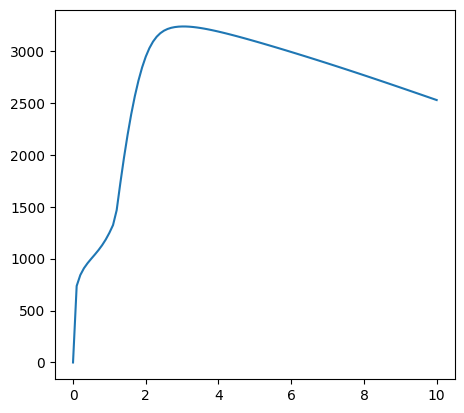

In [ ]:
# for single propellant mix and pressure use
import matplotlib.pyplot as plt
from rocketcea.cea_obj import CEA_Obj
import pandas as pd
import numpy as np


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

kelvin = 0.5555555556 #how many kelvins in a rankine

# use this to change grid bounds
minx = 0  #default 0
maxx = 10 #default 10

# sample pcL from quickstart guide of rocketcea
Pc = 500.
eps = 50.

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="Kerosene")

isparr = []
temprankine = []
tempkelvin = []
MR = 0.0
mrarr = []
label = []
delta = []

def findmax(xseries, yseries, color):
  xmax = pd.Series(xseries).idxmax() # index of max xseries
  ymax = pd.Series(yseries).idxmax() # index of max yseries
  print(xseries[ymax])
  print(yseries[ymax])

while MR < 10.0:
  isparr.append(ispObj.get_Isp(Pc=Pc, MR=MR,eps=eps))
  temprankine.append(ispObj.get_Temperatures(Pc=Pc, MR=MR, eps=eps))

  mrarr.append(MR)
  MR += 0.1 # smaller for more precise data

#change index for array for different TCA locations
# 0 = chamber
# 1 = throat
# 2 = exit
tempkelvin = [t[0] * kelvin for t in temprankine]

arrayisparr = np.array(isparr)
arraytemp = np.array(tempkelvin)


delta = np.subtract(arraytemp, arrayisparr)
#delta = [element * 0.103 for element in delta]
print(delta)

plt.plot(mrarr,delta) # defining ispplot as primary

findmax(mrarr, delta, 'b')

#tempplot = temp.plot(mrarr,tempkelvin,'r',label='Tc')
#isp.set_xlabel('Mixture Ratio (O/F)')
#isp.set_ylabel('Isp (sec)')
#isp.yaxis.label.set_color('blue')
#isp.tick_params(axis='y', labelcolor='blue')
#isp.set_ylim([0,400])

#temp.set_ylabel("Temperature (K)", color='red')
#temp.yaxis.label.set_color('red')
#temp.tick_params(axis='y', labelcolor='red')
#temp.set_ylim([0,5000])

#isp.legend(loc='upper right')
#temp.legend(loc=[0.8,0.84])
#isp.grid(True)

#plt.xlim(minx,maxx)
#plt.title("OF vs. Isp, OF vs. Temp\n Ox / Fuel: " + ispObj.desc + "\neps = %g Pc=%g psia"%(eps,Pc))

plt.show()

# Propellant Properties

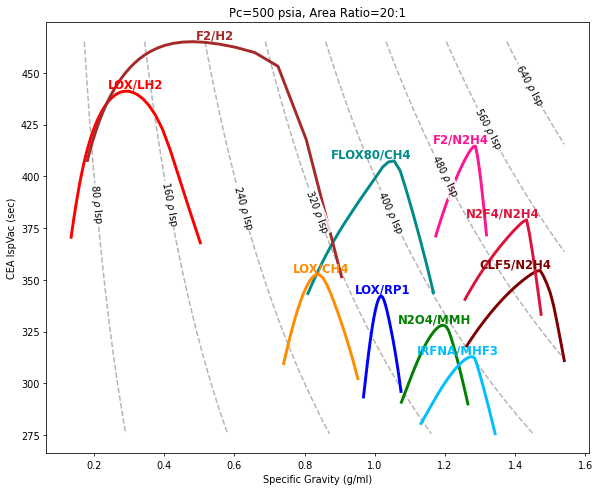

In [ ]:
from rocketcea.biprop_utils.rho_isp_plot_obj import RhoIspPlot
rp = RhoIspPlot()
rp.add_rho_isp_contours(label_frac_pos=0.4)
rp.show()

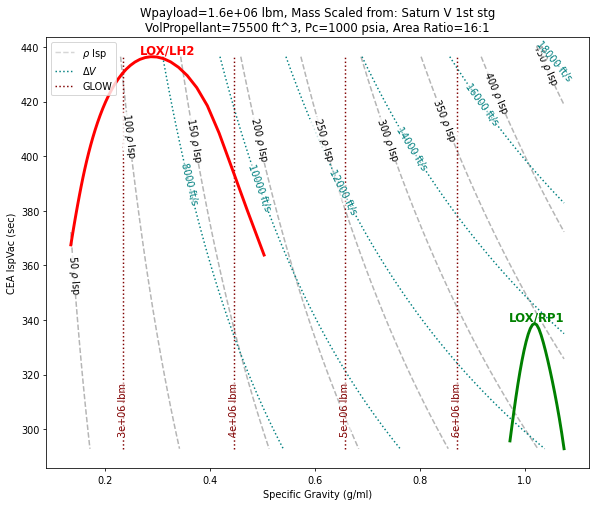

In [ ]:
from rocketcea.biprop_utils.rho_isp_plot_obj import RhoIspPlot
from rocketcea.biprop_utils.veh_stage_obj import ReferenceStage

rp = RhoIspPlot(bipropL=[('LOX','LH2'), ('LOX','RP1')], Pc=1000., eps=16)

stg_obj = ReferenceStage( WtPayload=1600000.0, volCuInRef=75500.0*1728, WtInertRef=300000.0,
                          Name='Saturn V 1st stg')

rp.add_rho_isp_contours(label_frac_pos=0.2)
rp.add_stage_param_contours( stg_obj, set_param='VolPropellant', param_value=75500.0*1728,
                             label_frac_posD={'GLOW':0.1, 'CubicFt':.4, 'MassFrac':.5},
                             plot_param_valD={'DeltaV':[8000,10000,12000,14000,16000,18000],
                                              'MassFrac':[0.86,0.88,0.9,0.92,0.94,0.95],
                                              'GLOW':[3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6]    },
                             plot_paramL=['DeltaV','GLOW'], num_ticks=6)
rp.show()